In [61]:
import pandas as pd

melb_data = pd.read_csv('data/melb_data_ps.csv')
melb_data.head()

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Coordinates
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1,202.0,126.0,1970,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,"-37.7996, 144.9984"
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,0,156.0,79.0,1900,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,"-37.8079, 144.9934"
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,0,134.0,150.0,1900,Yarra,-37.8093,144.9944,Northern Metropolitan,4019,"-37.8093, 144.9944"
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,1,94.0,126.0,1970,Yarra,-37.7969,144.9969,Northern Metropolitan,4019,"-37.7969, 144.9969"
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,2,120.0,142.0,2014,Yarra,-37.8072,144.9941,Northern Metropolitan,4019,"-37.8072, 144.9941"


In [62]:
melb_df = melb_data.copy()

In [63]:
melb_df.drop(['index', 'Coordinates'], axis=1, inplace=True)

In [64]:
total_rooms = melb_df['Bathroom'] + melb_df['Bedroom'] + melb_df['Rooms']

In [65]:
melb_df['MeanRoomsSquare'] = melb_df['BuildingArea']/total_rooms

In [66]:
display(melb_df['MeanRoomsSquare'])

0        25.200000
1        15.800000
2        18.750000
3        15.750000
4        17.750000
           ...    
13575    12.600000
13576    16.625000
13577    15.750000
13578    17.444444
13579    12.444444
Name: MeanRoomsSquare, Length: 13580, dtype: float64

In [67]:
diff_area = melb_df['BuildingArea'] - melb_df['Landsize']
sum_area = melb_df['BuildingArea'] + melb_df['Landsize']
melb_df['AreaRatio'] = diff_area/sum_area
display(melb_df['AreaRatio'])

0       -0.231707
1       -0.327660
2        0.056338
3        0.145455
4        0.083969
           ...   
13575   -0.676093
13576   -0.429185
13577   -0.551601
13578   -0.693060
13579   -0.527426
Name: AreaRatio, Length: 13580, dtype: float64

<Axes: >

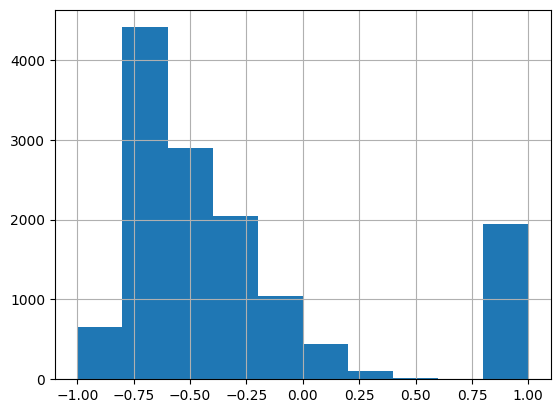

In [68]:
import matplotlib as plt
melb_df['AreaRatio'].hist()

In [69]:
display(melb_df['Date'])

0         3/12/2016
1         4/02/2016
2         4/03/2017
3         4/03/2017
4         4/06/2016
            ...    
13575    26/08/2017
13576    26/08/2017
13577    26/08/2017
13578    26/08/2017
13579    26/08/2017
Name: Date, Length: 13580, dtype: object

In [70]:
melb_df['Date'] = pd.to_datetime(melb_df['Date'], dayfirst=True)
display(melb_df['Date'])

0       2016-12-03
1       2016-02-04
2       2017-03-04
3       2017-03-04
4       2016-06-04
           ...    
13575   2017-08-26
13576   2017-08-26
13577   2017-08-26
13578   2017-08-26
13579   2017-08-26
Name: Date, Length: 13580, dtype: datetime64[ns]

In [71]:
month_sold = melb_df['Date'].dt.month #return pd.Series

<Axes: >

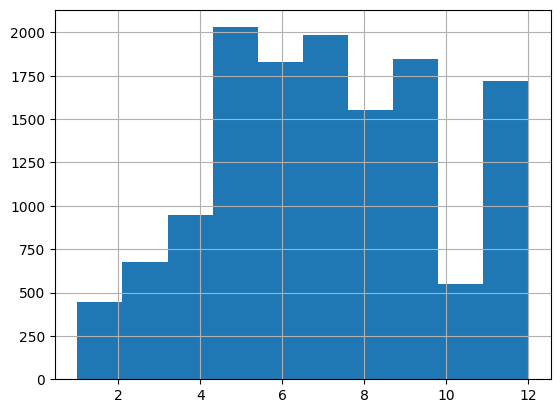

In [72]:
month_sold.hist()

In [73]:
melb_df['MonthSale'] = month_sold
melb_df['MonthSale'].value_counts(normalize=True)

MonthSale
5     0.149411
7     0.145950
9     0.135862
6     0.134757
8     0.114138
11    0.082032
4     0.069882
3     0.049926
12    0.044698
10    0.040574
2     0.032622
1     0.000147
Name: proportion, dtype: float64

In [74]:
delta_days = melb_df['Date'] - pd.to_datetime('2016-01-01') 
display(delta_days) #timedelta

0       337 days
1        34 days
2       428 days
3       428 days
4       155 days
          ...   
13575   603 days
13576   603 days
13577   603 days
13578   603 days
13579   603 days
Name: Date, Length: 13580, dtype: timedelta64[ns]

In [75]:
display(delta_days.dt.days) #timedelta to int

0        337
1         34
2        428
3        428
4        155
        ... 
13575    603
13576    603
13577    603
13578    603
13579    603
Name: Date, Length: 13580, dtype: int64

In [76]:
melb_df['AgeBuilding'] = melb_df['Date'].dt.year - melb_df['YearBuilt']
melb_df['AgeBuilding']

0         46
1        116
2        117
3         47
4          2
        ... 
13575     36
13576     22
13577     20
13578     97
13579     97
Name: AgeBuilding, Length: 13580, dtype: int64

In [77]:
melb_df = melb_df.drop('YearBuilt', axis=1)

In [78]:
melb_df['WeekdaySale'] = melb_df['Date'].dt.day_of_week
melb_df['WeekdaySale'].value_counts()[5] + melb_df['WeekdaySale'].value_counts()[6]

12822

In [79]:
melb_data['Address'].nunique()

13378

In [80]:
print(melb_df['Address'].loc[177])
print(melb_df['Address'].loc[1812])
print(melb_df['Address'].loc[9001])

2/119 Railway St N
9/400 Dandenong Rd
172 Danks St


In [81]:
# На вход данной функции поступает строка с адресом.
def get_street_type(address):
    exclude_list = ['N', 'S', 'W', 'E']

    address_list = address.split(' ')
    street_type = address_list[-1]
    
    if street_type in exclude_list:
        street_type = address_list[-2]
    return street_type

In [97]:
street_types = melb_df['Address'].apply(get_street_type)
popular_stypes =street_types.value_counts().nlargest(10).index
len(street_types.value_counts())

56

In [98]:
def abbreviate(type):
    str_dict = {'Street': 'St', 'Road': 'Rd', 'Avenue': 'Av', 'Parade': 'Pde', 'Boulevard': 'Bvd', 'Crescent': 'Ct'}
    if type in list(str_dict.keys()):
        return str_dict[type]
    return type

In [99]:
street_types = street_types.apply(abbreviate)
len(street_types.value_counts())

52

In [100]:
melb_df['StreetType'] = street_types.apply(lambda x: x if x in popular_stypes else 'other')
melb_df['StreetType']

0           St
1           St
2           St
3        other
4           St
         ...  
13575       Cr
13576       Dr
13577       St
13578       St
13579       St
Name: StreetType, Length: 13580, dtype: object

In [101]:
melb_df = melb_df.drop('Address', axis=1)
melb_df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Lattitude,Longtitude,Regionname,Propertycount,MeanRoomsSquare,AreaRatio,MonthSale,AgeBuilding,WeekdaySale,StreetType
0,Abbotsford,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067,2,...,-37.7996,144.9984,Northern Metropolitan,4019,25.20,-0.231707,12,46,5,St
1,Abbotsford,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067,2,...,-37.8079,144.9934,Northern Metropolitan,4019,15.80,-0.327660,2,116,3,St
2,Abbotsford,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067,3,...,-37.8093,144.9944,Northern Metropolitan,4019,18.75,0.056338,3,117,5,St
3,Abbotsford,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067,3,...,-37.7969,144.9969,Northern Metropolitan,4019,15.75,0.145455,3,47,5,other
4,Abbotsford,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067,3,...,-37.8072,144.9941,Northern Metropolitan,4019,17.75,0.083969,6,2,5,St


In [103]:
def get_weekend(weekday):
    if weekday in (5,6):
        return 1
    return 0

In [105]:
melb_df['Weekend'] = melb_df['WeekdaySale'].apply(get_weekend)

In [106]:
melb_df[melb_df['Weekend'] == 1]['Price'].mean()

1081198.6406956792

In [107]:
# создаём пустой список
unique_list = []
# пробегаемся по именам столбцов в таблице
for col in melb_df.columns:
    # создаём кортеж (имя столбца, число уникальных значений)
    item = (col, melb_df[col].nunique(),melb_df[col].dtypes)     # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
display(unique_counts)

,Column_Name,Num_Unique,Type
0,Weekend,2,int64
1,Type,3,object
2,Method,5,object
3,WeekdaySale,5,int32
4,Regionname,8,object
5,Bathroom,9,int64
6,Rooms,9,int64
7,Car,11,int64
8,StreetType,11,object
9,Bedroom,12,int64
